# Project: Regression Modeling with the Boston Housing Dataset

## Introduction

In this final lab, we shall apply the regression analysis and diagnostics techniques covered in this section to a familiar "Boston Housing" dataset. We performed a detailed EDA for this dataset in earlier section and hence carry a good understanding of how this dataset is composed. This this lab we shall try to identify the predictive ability of some of features found in this dataset towards identifying house price. 

### Objectives:
You will be able to:
* Build many linear models with boston housing data set using OLS
* For each model, analyze OLS diagnostics for model validity 
* Visually explain the results and interpret the diagnostics from Statsmodels 
* Comment on the goodness of fit for a simple regression model

Let's get started. 

### Import necessary libraries and load 'BostonHousing.csv' as pandas dataframe.

In [85]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import seaborn as sns
import scipy.stats as stats

In [2]:
housing_df = pd.read_csv('BostonHousing.csv')
housing_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


The data features and target are present as columns in boston data. Boston data gives a set of independent as independent variables in data and the housing rate as `MEDV` in target property. Also feature names are listed in feature_names. The desription is available at [KAGGLE](https://www.kaggle.com/c/boston-housing). 

### Inspect the columns of the dataset and comment on type of variables present

In [3]:
# Your code here
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
b          506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


### Record your observations here 
1. No nulls. Yay!
2. All columns are numerical. 11 floats, 3 integer columns.
3. 506 rows/entries, 14 columns
4. medv is our target variable

### Create histograms for all variables in the dataset and comment on their shape (uniform or not ?)

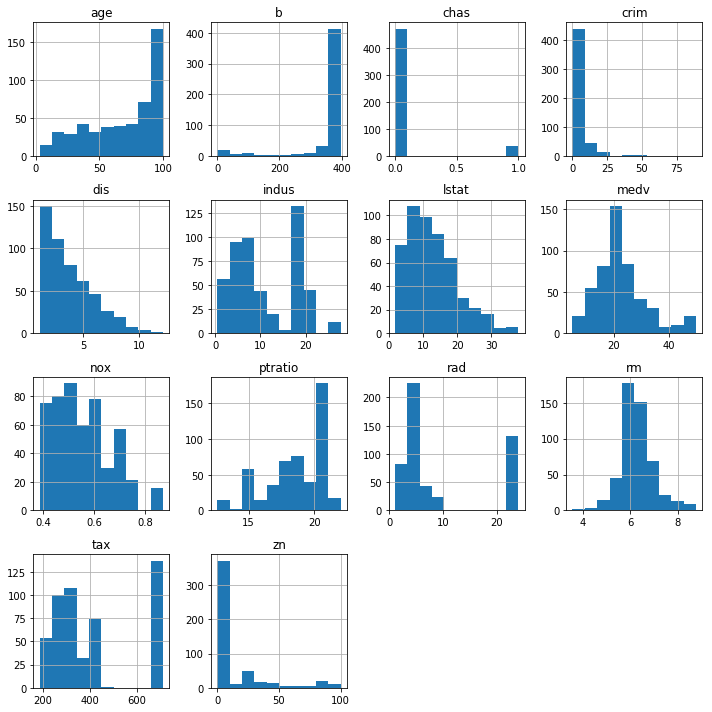

In [13]:
# Your code here 
housing_df.hist(figsize=(10,10))
plt.tight_layout()
plt.show()

### You observations here 
- age: lots of older houses, >150 houses are nearly 100 years old, skewed left
- b: most of the houses in the dataset have a low proportion of black people
- chas: binary data, most houses are not next to the river
- crim: most houses are within a town with a low crime rate per capita
- dis: normally skewed right, with more houses in closer proximity to employment areas
- indus: generally bimodal, though there is a relatively low proportion of non-retail business areas
- lstat: skewed right, most properties are in an area with low proportion of low status population
- medv: roughly normally distributed, median home value of owner-occupied houses is around 20K
- nox: roughly skewed right, most houses fall between a concentration of .4 and .6
- ptratio: roughly skewed left, most houses are in an area with a 20-to-1 student-teacher ratio
- rad: bimodal, majority of houses are between an index of 0 to 10, though a good amount appear with an index >20
- rm: normally distributed, mean # of rooms is ~6
- tax: bimodal, most houses in property tax range 200-400 per 10,000 house value, a set of houses at > 600 for property tax rate
- zn: right skewed, most houses in areas zoned for smaller residential lots

Based on this , we shall choose a selection of features which appear to be more 'normal' than others.
### Create a new dataset with `['crim', 'dis', 'rm', 'zn', 'age', 'medv']`

In [16]:
housing_df2 = housing_df.loc[:, ['crim', 'dis', 'rm', 'zn', 'age', 'medv']]
housing_df2.head()

,crim,dis,rm,zn,age,medv
0,0.00632,4.0900,6.575,18.0,65.2,24.0
1,0.02731,4.9671,6.421,0.0,78.9,21.6
2,0.02729,4.9671,7.185,0.0,61.1,34.7
3,0.03237,6.0622,6.998,0.0,45.8,33.4
4,0.06905,6.0622,7.147,0.0,54.2,36.2


### Check for linearity assumption for all chosen features with target variable using scatter plots and comment on the results

Text(0.5, 0, 'crim')

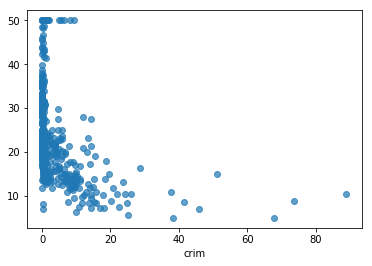

In [33]:
plt.scatter(housing_df2['crim'], housing_df2['medv'], alpha=0.7)
plt.xlabel('crim')


Slight negative linear relationship. High value homes in areas with low crime. Steep at first and then shallow. Crime rate has a decreasing marginal effect on house value.

Text(0.5, 0, 'dis')

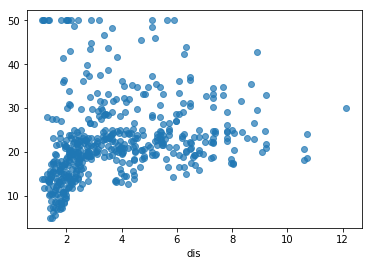

In [35]:
plt.scatter(housing_df2['dis'], housing_df2['medv'], alpha=0.7)
plt.xlabel('dis')

There are a lot of lower value homes closer to employment centers. Starts as positive relationship, stronger relationship under 4 miles, beyond 4 miles relationship is weaker. 

Text(0.5, 0, 'rm')

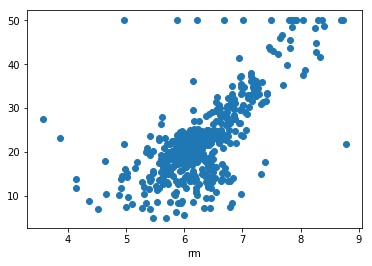

In [30]:
plt.scatter(housing_df2['rm'], housing_df2['medv'])
plt.xlabel('rm')

Pretty strong positive, linear relationship between average number of rooms and median home value.

Text(0.5, 0, 'zn')

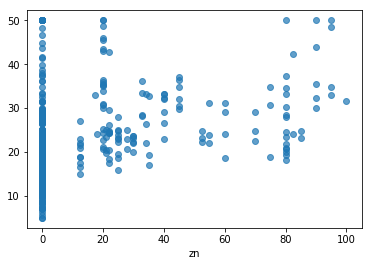

In [36]:
plt.scatter(housing_df2['zn'], housing_df2['medv'], alpha=0.7)
plt.xlabel('zn')

Data appears to be discrete. All homes below ~15,000 are in areas with no large residential lots. And most houses appear to be in zones with no large residential lots. Weak positive relationship between median house value and proportion of large residential lots in area above 0.

Text(0.5, 0, 'age')

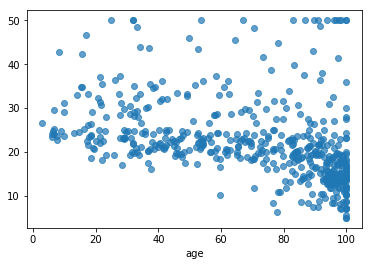

In [37]:
plt.scatter(housing_df2['age'], housing_df2['medv'], alpha=0.7)
plt.xlabel('age')

Shallow, medium-strength negative relationship, older houses have lower value in general. Houses under ~50 years are valued above ~15,000. Houses over ~90 years are mostly valued below ~20,000.

Okie so obviously our data needs a lot of pre-procesing to improve the results. This key behind such kaggle competitions is to process the data in such a way that we can identify the relationships and make predictions in the best possible way. For now, we shall leave the dataset untouched and just move on with regression. So far, our assumptions, although not too strong, but still hold to a level that we can move on. 

### Let's do Regression 

Right here is the real deal. Let's perform a number of simple regression experiments between the chosen independent variables and the dependent variable (price). We shall do this is a loop and in every iteration, we shall pick one of the independent variables  perform following steps:

* Run a simple OLS regression between independent and dependent variables
* Plot a regression line on the scatter plots
* Plot the residuals using `sm.graphics.plot_regress_exog()`.
* Plot a Q-Q plot for regression residuals normality test 
* Store following values in array for each iteration:
    * Independent Variable
    * r_squared'
    * intercept'
    * 'slope'
    * 'p-value'
    * 'normality (JB)' 
* Comment on each output 

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Wed, 10 Apr 2019   Prob (F-statistic):           1.17e-19
Time:                        18:44:25   Log-Likelihood:                -1798.9
No. Observations:                 506   AIC:                             3602.
Df Residuals:                     504   BIC:                             3610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.0331      0.409     58.740      0.0

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     83.48
Date:                Wed, 10 Apr 2019   Prob (F-statistic):           1.57e-18
Time:                        18:44:26   Log-Likelihood:                -1801.5
No. Observations:                 506   AIC:                             3607.
Df Residuals:                     504   BIC:                             3615.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.9787      0.999     31.006      0.0

[['crim',
  0.15078046904975717,
  24.033106174123876,
  -0.4151902779150912,
  1.1739870821942348e-19,
  295.40371976845904],
 ['dis',
  0.062464372121782796,
  18.39008833049339,
  1.091613015841109,
  1.2066117273371135e-08,
  305.10416474827383],
 ['rm',
  0.4835254559913341,
  -34.670620776438575,
  9.102108981180312,
  2.48722887100781e-74,
  612.4489850641658],
 ['zn',
  0.12992084489428946,
  20.917579117799825,
  0.14213999415535425,
  5.713584153081099e-17,
  262.3874997814499],
 ['age',
  0.14209474407780465,
  30.97867776261805,
  -0.12316272123567976,
  1.569982209188055e-18,
  456.98343364898903]]

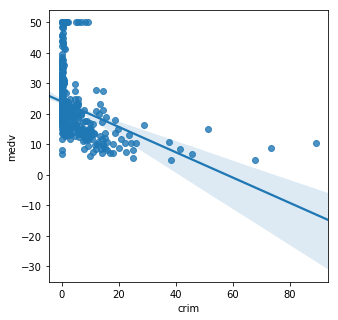

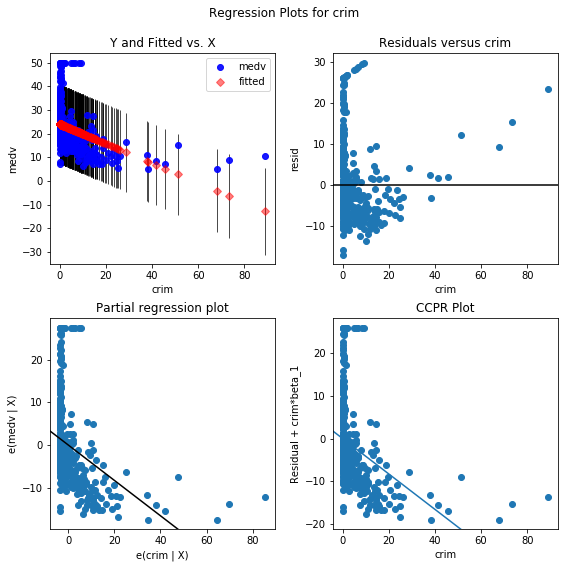

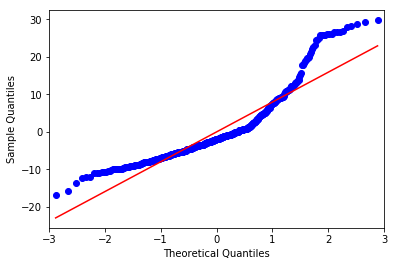

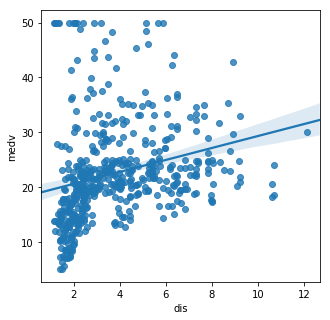

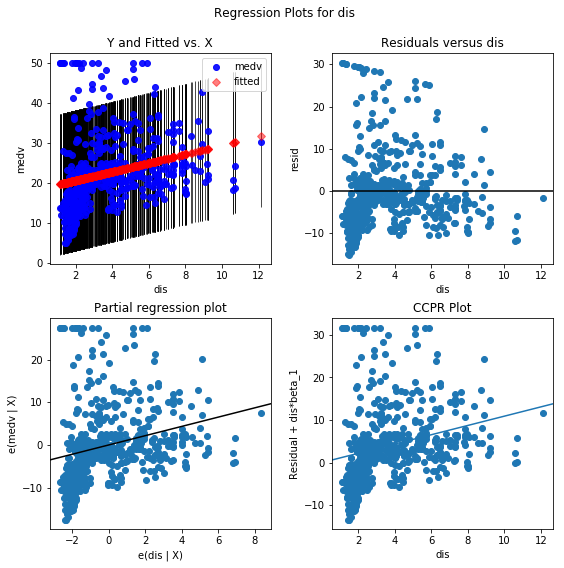

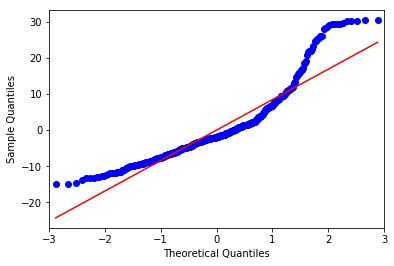

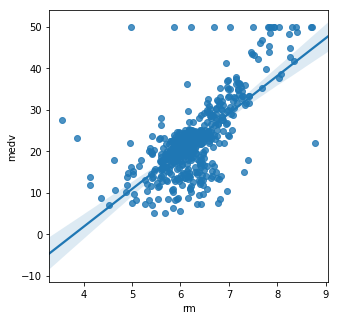

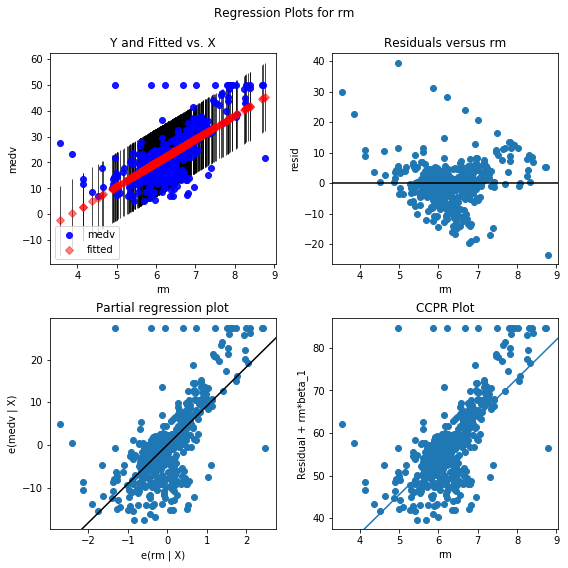

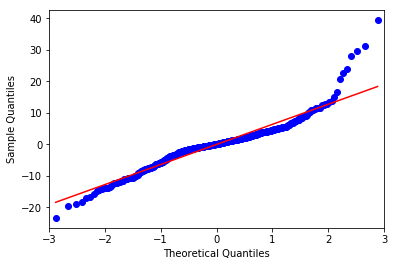

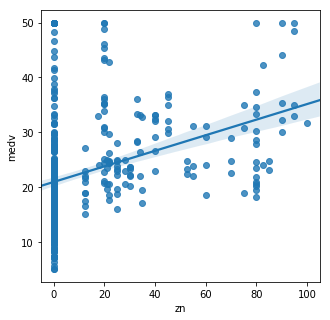

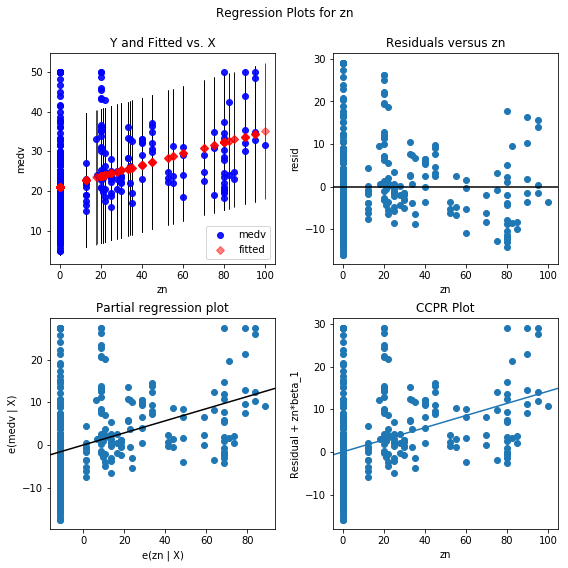

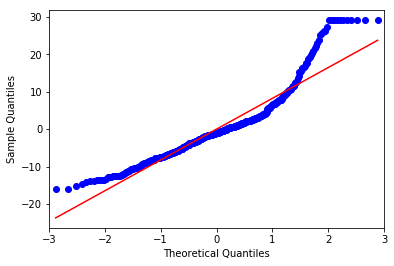

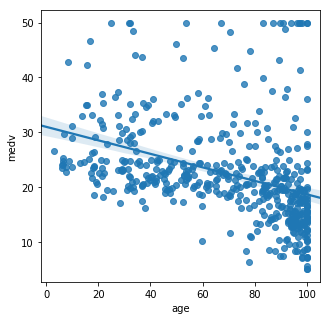

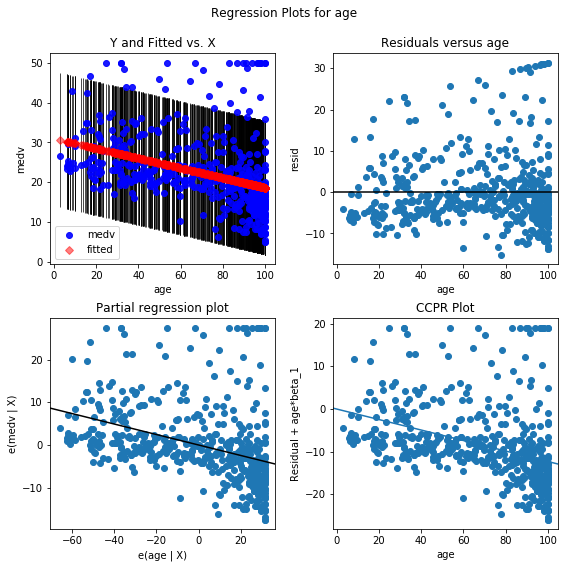

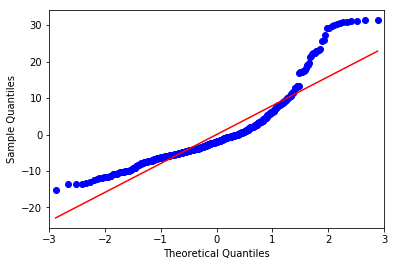

In [123]:
ind_vars = list(housing_df2.columns[:-1])
master_list = []
for iv in ind_vars:
    result = smf.ols(formula=f"medv ~ {iv}", data=housing_df2).fit()
    r_summ = result.summary()
    plt.figure(iv,figsize=(5,5))
    reg_plot = sns.regplot(x=housing_df2[f'{iv}'], y=housing_df2['medv'])
    fig = plt.figure(figsize=(8,8))
    resid_plot = sm.graphics.plot_regress_exog(result,iv,fig=fig)
    qq_plot = sm.qqplot(result.resid, line = 'r')
    master_list.append([f'{iv}', result.rsquared, result.params[0], 
                  result.params[1], result.pvalues[1],sms.jarque_bera(result.resid)[0]])
    print(r_summ, reg_plot, resid_plot, qq_plot, master_list)

In [126]:
master_list
iv_array = np.array([np.array(iv_list) for iv_list in master_list])
iv_array

array([['crim', '0.15078046904975717', '24.033106174123876',
        '-0.4151902779150912', '1.1739870821942348e-19',
        '295.40371976845904'],
       ['dis', '0.062464372121782796', '18.39008833049339',
        '1.091613015841109', '1.2066117273371135e-08',
        '305.10416474827383'],
       ['rm', '0.4835254559913341', '-34.670620776438575',
        '9.102108981180312', '2.48722887100781e-74', '612.4489850641658'],
       ['zn', '0.12992084489428946', '20.917579117799825',
        '0.14213999415535425', '5.713584153081099e-17',
        '262.3874997814499'],
       ['age', '0.14209474407780465', '30.97867776261805',
        '-0.12316272123567976', '1.569982209188055e-18',
        '456.98343364898903']], dtype='<U22')

Boston Housing DataSet - Regression Analysis and Diagnostics for formula: medv~crim
-------------------------------------------------------------------------------------


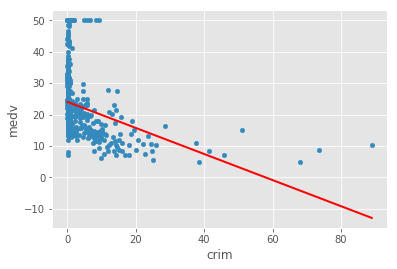

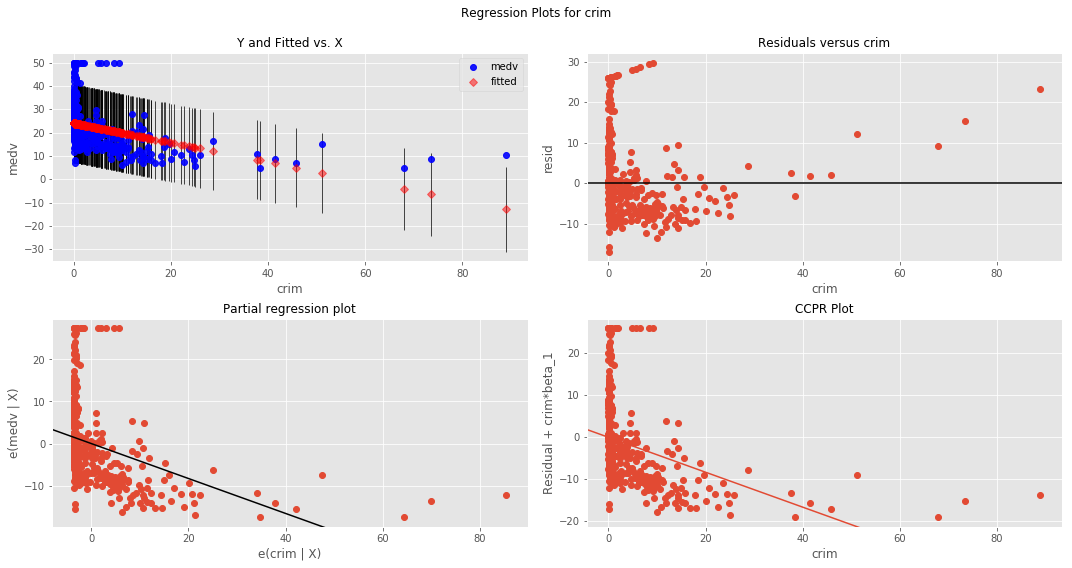

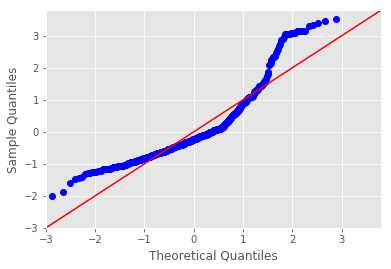

Press Enter to continue...
Boston Housing DataSet - Regression Analysis and Diagnostics for formula: medv~dis
-------------------------------------------------------------------------------------


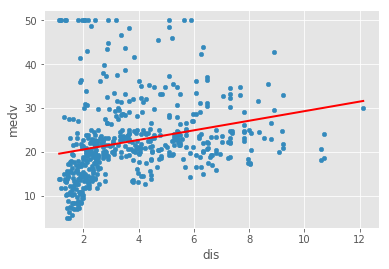

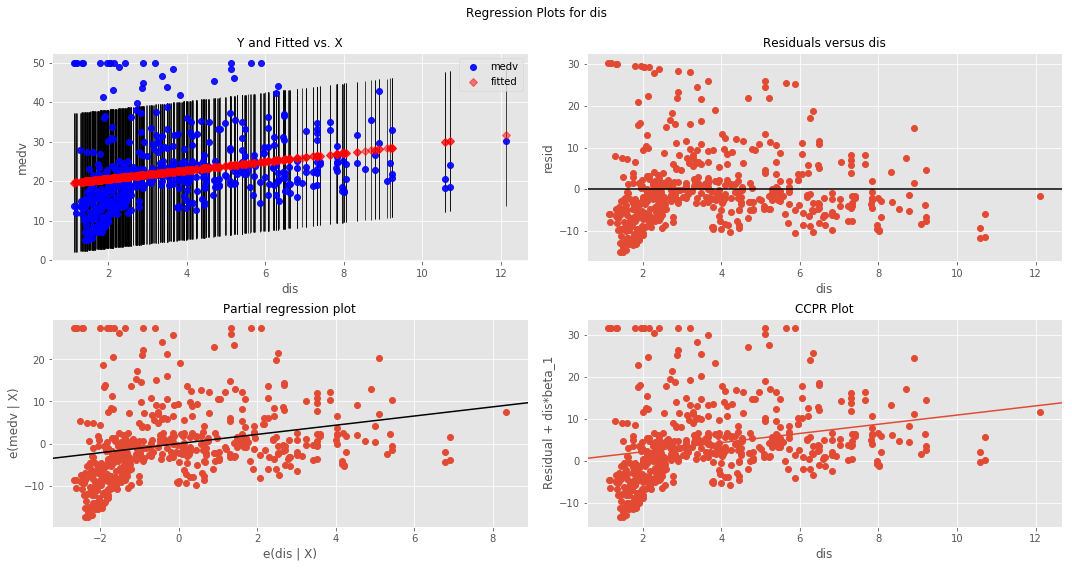

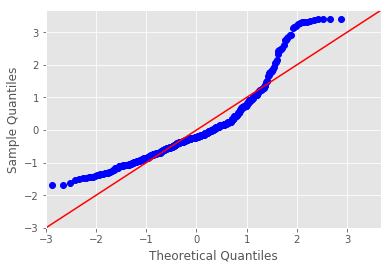

Press Enter to continue...
Boston Housing DataSet - Regression Analysis and Diagnostics for formula: medv~rm
-------------------------------------------------------------------------------------


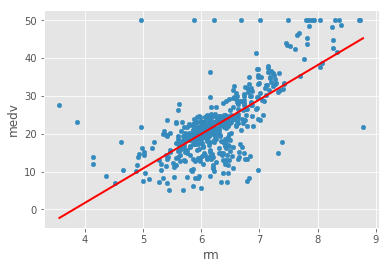

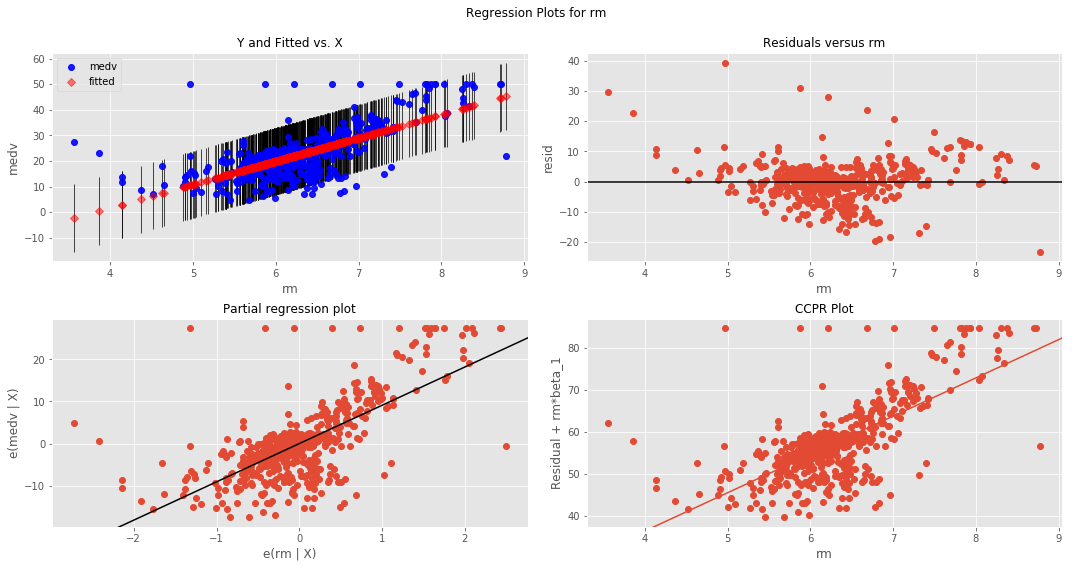

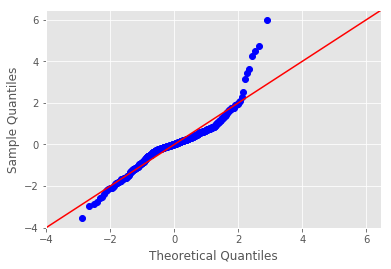

Press Enter to continue...
Boston Housing DataSet - Regression Analysis and Diagnostics for formula: medv~zn
-------------------------------------------------------------------------------------


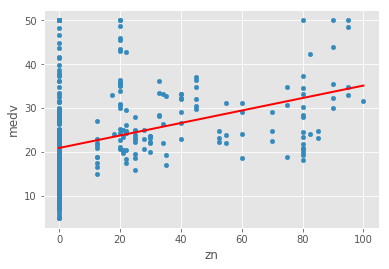

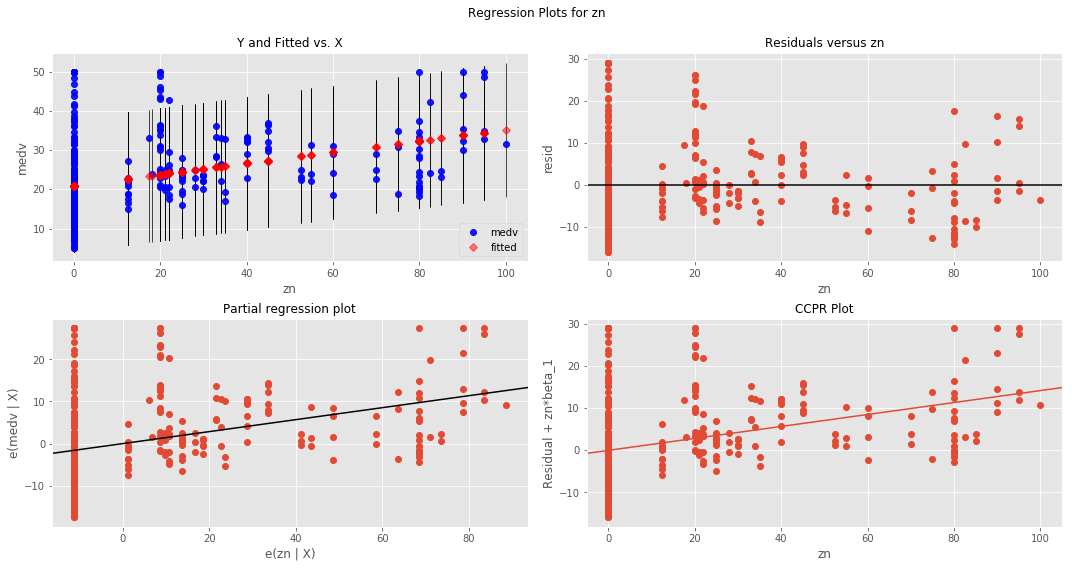

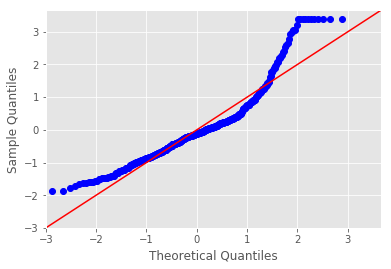

Press Enter to continue...
Boston Housing DataSet - Regression Analysis and Diagnostics for formula: medv~age
-------------------------------------------------------------------------------------


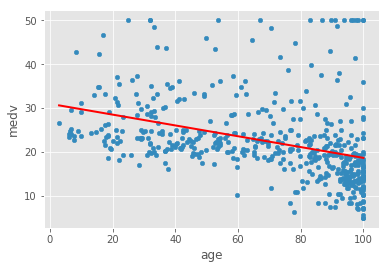

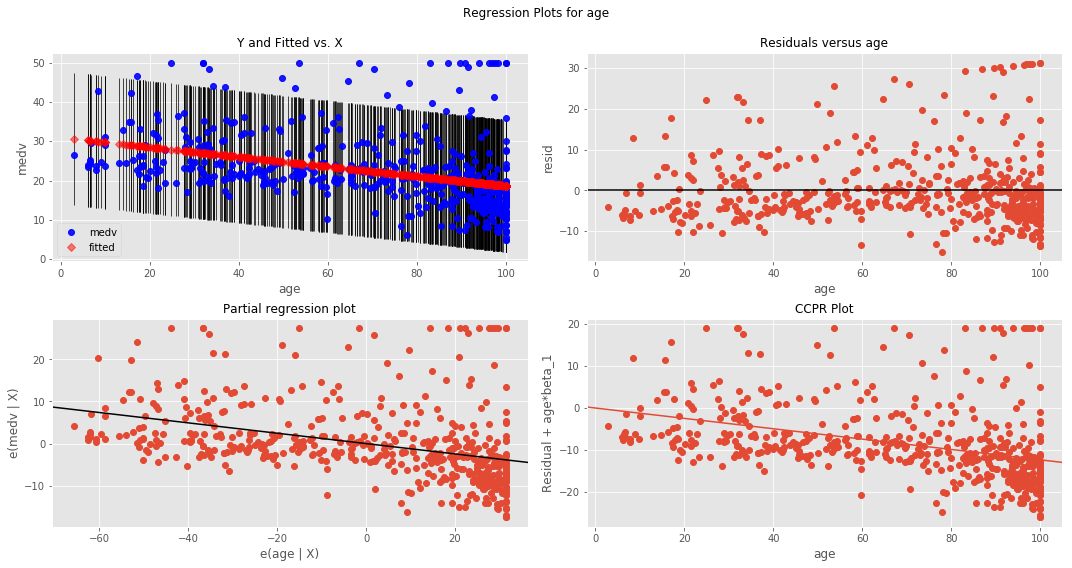

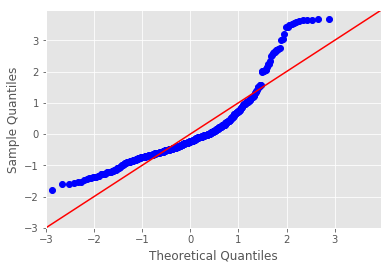

Press Enter to continue...


In [6]:
# Your code here

In [128]:
iv_df = pd.DataFrame(iv_array)

,0,1,2,3,4,5
0,crim,0.15078046904975717,24.033106174123876,-0.4151902779150912,1.1739870821942348e-19,295.40371976845904
1,dis,0.062464372121782796,18.39008833049339,1.091613015841109,1.2066117273371135e-08,305.10416474827383
2,rm,0.4835254559913341,-34.670620776438575,9.102108981180312,2.48722887100781e-74,612.4489850641658
3,zn,0.12992084489428946,20.917579117799825,0.14213999415535425,5.713584153081099e-17,262.3874997814499
4,age,0.14209474407780465,30.97867776261805,-0.12316272123567976,1.569982209188055e-18,456.98343364898903


In [118]:
#Your obervations here 


So clearly the results are not highly reliable. the best good of fit i.e. r-squared is witnessed with `rm`. So clearly in this analysis this is our best predictor. 

---
#### So how can we improve upon these results . 
1. Pre-Processing 

This is where pre-processing of data comes in. Dealing with outliers, normalizing data, scaling values etc can help regression analysis get more meaningful results from the given set of data 

2. Advanced Analytical Methods

Simple regression is a very basic analysis techniques and trying to fit a straight line solution to complex analytical questions may prove to be very inefficient. In the next section we shall look at multiple regression where we can use multiple features **AT ONCE** to define a relationship with outcome. We shall also look at some pre-processing and data simplification techniques and re-visit the boston dataset with an improved toolkit. 

## Level up - Optional 

Apply some data wrangling skills that you have learned in previous section to pre-process the set of independent variables we chose above. You can start off with outliers and think of a way to deal with them. See how it affects the the goodness of fit. 
![](https://i.pinimg.com/originals/e5/a5/1e/e5a51eff1b2133105ebaa9b779106ae2.png)

## Summary 

In this lab, we attempted to bring in all the skills learnt so far to a slighlt detailed dataset. We looked at the outcome of our analysis and realized that the data might need some pre-processing to see a clear improvement in results. We shall pick it up in the next section from this point and bring in data pre-processing techniques along with some assumptions that are needed for multiple regression . 